# This model will be used for automatic anomaly detection in the industrial process using Neural Networks

* The Tennessee Eastman Process Simulation Dataset will be used to train the model
* [Check the TN Eastman dataset here](https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset/code)

# Import kagglehub and Download the Tennessee Eastman Process DataSet

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("averkij/tennessee-eastman-process-simulation-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.28G/1.28G [00:09<00:00, 139MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/averkij/tennessee-eastman-process-simulation-dataset/versions/1


# Install pyreadr
 The data is in the RData format, so we need pyreadr

In [2]:
!pip install pyreadr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.7/411.7 kB 6.3 MB/s eta 0:00:00


# Load the data and see the results

We are going to use the "Fault Free" Data (data without deffects)
 * the model will be trained on the *Fault Free* data
 * the *Faulty* data will be used to see if the model detects anomalies/faults

 `df_fault_free` - this contains the data without defects (*faultNumber = 0*)


In [3]:
import pyreadr
import os

rdata_path = os.path.join(path, "TEP_FaultFree_Testing.RData")

# Load the RData file
result = pyreadr.read_r(rdata_path)

#
print(result.keys())

#
df_fault_free = result[list(result.keys())[0]]
df_fault_free.head()

odict_keys(['fault_free_testing'])


,faultNumber,simulationRun,sample,xmeas_1,xmeas_2,xmeas_3,xmeas_4,xmeas_5,xmeas_6,xmeas_7,...,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,xmv_10,xmv_11
0,0,1.0,1,0.25171,3672.4,4466.3,9.5122,27.057,42.473,2705.6,...,54.494,24.527,59.710,22.357,40.149,40.074,47.955,47.300,42.100,15.345
1,0,1.0,2,0.25234,3642.2,4568.7,9.4145,26.999,42.586,2705.2,...,53.269,24.465,60.466,22.413,39.956,36.651,45.038,47.502,40.553,16.063
2,0,1.0,3,0.24840,3643.1,4507.5,9.2901,26.927,42.278,2703.5,...,54.000,24.860,60.642,22.199,40.074,41.868,44.553,47.479,41.341,20.452
3,0,1.0,4,0.25153,3628.3,4519.3,9.3347,26.999,42.330,2703.9,...,53.860,24.553,61.908,21.981,40.141,40.066,48.048,47.440,40.780,17.123
4,0,1.0,5,0.21763,3655.8,4571.0,9.3087,26.901,42.402,2707.7,...,53.307,21.775,61.891,22.412,37.696,38.295,44.678,47.530,41.089,18.681


from matplotlib import pyplot as plt
_df_0['sample'].plot(kind='hist', bins=20, title='sample')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['xmeas_1'].plot(kind='hist', bins=20, title='xmeas_1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['xmeas_2'].plot(kind='hist', bins=20, title='xmeas_2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['xmeas_3'].plot(kind='hist', bins=20, title='xmeas_3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='sample', y='xmeas_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='xmeas_1', y='xmeas_2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='xmeas_2', y='xmeas_3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='xmeas_3', y='xmeas_4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_2']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_2')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_3']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_3')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['faultNumber']
  ys = series['xmeas_4']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('faultNumber', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('faultNumber')
_ = plt.ylabel('xmeas_4')

from matplotlib import pyplot as plt
_df_12['sample'].plot(kind='line', figsize=(8, 4), title='sample')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['xmeas_1'].plot(kind='line', figsize=(8, 4), title='xmeas_1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['xmeas_2'].plot(kind='line', figsize=(8, 4), title='xmeas_2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['xmeas_3'].plot(kind='line', figsize=(8, 4), title='xmeas_3')
plt.gca().spines[['top', 'right']].set_visible(False)

# See number of samples
* as shown below we have a total of 480,000 samples with faultNumber = 0

In [4]:
df_fault_free['faultNumber'].value_counts()

,count
faultNumber,
0,480000


# Split the data

* we select all `xmeas` and `xmv` columns
* those will be our parameters, 52 in total
* so, our input Tensor shape will be `(480000, 52)`

In [5]:
x_columns = [col for col in df_fault_free.columns if col.startswith("xmeas") or col.startswith("xmv")]

X = df_fault_free[x_columns].values
print(X.shape)

(480000, 52)


# Normalize the Data

* since some values can be very large and others very small, we normalize our data so that all values will be represented in a range from 0 to  1
* otherwise, the model might give more importance to features with larger values

In [6]:
# will use the MinMaxScaler to normalize our data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X) # now our values are in a range from 0 to 1

# Let's now turn our data into a Tensor using PyTorch
* since we have 480,000 sample we will feed the data to our model in batches
* we will start by using a 2048 batch size



In [7]:
import torch
from torch import nn # the pytorch neural network module
from torch.utils.data import TensorDataset, DataLoader # to create batches of our data

BATCH_SIZE = 2048

# Turn Data into Tensor
X_tensor = torch.tensor(X_normalized, dtype=torch.float32)

# Turn Data into batches
dataset = TensorDataset(X_tensor)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
print(X_tensor.shape)

torch.Size([480000, 52])


# Check the data from the first bach

* the first batch returns a `(2048, 52)` Tensor
* our data can now be feeded in batches into the model

In [8]:
training_batch = next(iter(data_loader))[0]
training_batch.shape, training_batch

(torch.Size([2048, 52]),
 tensor([[0.5143, 0.2726, 0.4658,  ..., 0.4805, 0.2508, 0.6040],
         [0.5467, 0.5772, 0.3507,  ..., 0.5504, 0.6215, 0.5372],
         [0.5445, 0.5050, 0.6040,  ..., 0.4895, 0.5301, 0.6417],
         ...,
         [0.3076, 0.4620, 0.6456,  ..., 0.4436, 0.4427, 0.5553],
         [0.4725, 0.4359, 0.5350,  ..., 0.5620, 0.4667, 0.6326],
         [0.7209, 0.6839, 0.2670,  ..., 0.5911, 0.7149, 0.3581]]))

# Let's setup agnostic code

* so that our model will work either on `cpu` or `gpu`, if available

In [9]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Setup AutoEncoder

* basically the AutoEncoder represnt how our model is designed to work with the data
* the `encoder` takes an input of 52 values and outputs 8 values - representing the key features
* the `decoder` takes as input those 8 values, and tries to reconstruct the original 52 values

In [10]:
class AutoEncoder(nn.Module):
  def __init__(self):
    super(AutoEncoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(in_features=52, out_features=24),
        nn.ReLU(),
        nn.Linear(in_features=24, out_features=8),
        nn.ReLU()
    )

    self.decoder = nn.Sequential(
        nn.Linear(in_features=8, out_features=24),
        nn.ReLU(),
        nn.Linear(in_features=24, out_features=52),
        nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

# Create an instance of the model
model_0 = AutoEncoder().to(device)
model_0

AutoEncoder(
  (encoder): Sequential(
    (0): Linear(in_features=52, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=8, bias=True)
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=8, out_features=24, bias=True)
    (1): ReLU()
    (2): Linear(in_features=24, out_features=52, bias=True)
    (3): Sigmoid()
  )
)

# Setup the loss function and optimizer

**Loss Function:**
* will use the `nn.MSELoss()` function to calculate the loss
* we compare the `decoder` output (what the model predicted) with the input of the `encoder`

**Optimizer:**
* will use `torch.optim.Adam` with a learning rate of 0.001


In [11]:
# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


In [12]:
from tqdm import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 6

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----------")
  model_0.train()
  total_loss = 0

  for batch in enumerate(data_loader):
    X = X_tensor.to(device)
    y_pred = model_0(X)
    loss = loss_fn(y_pred, X)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()

  avg_loss = total_loss / len(data_loader)


  print(f"Train loss: {avg_loss:.6f}")

  0%|          | 0/6 [00:00<?, ?it/s]

Epoch: 0
----------


 17%|█▋        | 1/6 [04:12<21:00, 252.20s/it]

Train loss: 0.010598
Epoch: 1
----------


 33%|███▎      | 2/6 [08:50<17:51, 267.81s/it]

Train loss: 0.007965
Epoch: 2
----------


 50%|█████     | 3/6 [13:19<13:24, 268.17s/it]

Train loss: 0.007349
Epoch: 3
----------


 67%|██████▋   | 4/6 [17:37<08:48, 264.08s/it]

Train loss: 0.007223
Epoch: 4
----------


 83%|████████▎ | 5/6 [22:11<04:27, 267.54s/it]

Train loss: 0.007176
Epoch: 5
----------


100%|██████████| 6/6 [26:37<00:00, 266.32s/it]

Train loss: 0.007142


In [13]:
X_tensor.device


device(type='cpu')

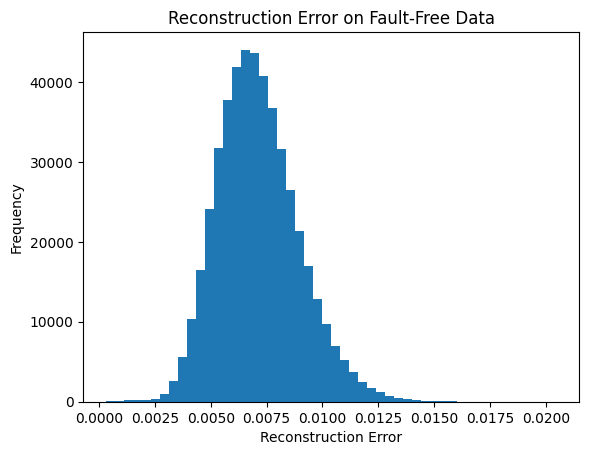

In [14]:
import matplotlib.pyplot as plt

model_0.eval()

reconstruction_errors = []

with torch.inference_mode():
    for i, batch in enumerate(data_loader):
        X = batch[0].to(device)
        y_pred = model_0(X.to(device))
        error = torch.mean((X - y_pred) ** 2, dim=1)
        reconstruction_errors.extend(error.cpu().numpy())

plt.hist(reconstruction_errors, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error on Fault-Free Data')
plt.show()